# Выбор локации для скважины

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [2]:
#data_0 = pd.read_csv('...')
#data_1 = pd.read_csv('...')
#data_2 = pd.read_csv('...')

- Изучаем данные 1-го региона

In [3]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропущенные значения отсутствуют.

In [4]:
data_0.nunique()

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Десять значений id повторяются. Т.к. их кол.-во относительно небольшое, не будем удалять такие строки.

In [5]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Значения признаков f0, f1 довольно близки, f2 отличается от них на один порядок.

In [6]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
data_0.duplicated().sum()

0

Дублированные строки отсутствуют.

Далее удалим из таблицы столбец 'id', т.к. идентификатор скважины не должен использоваться при обучении модели:

In [8]:
data_0 = data_0.drop('id', axis=1)

- Изучаем данные 2-го региона

In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_1.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

Повторяющихся значений id всего 4, не будем их удалять. Примечательно, что различных значений объема запасов product всего 12.

In [11]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Значения признаков f0, f1, f2 примерно одного порядка.

In [12]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [13]:
data_1.duplicated().sum()

0

Дублированных значений нет.

Удаляем из таблицы столбец 'id':

In [14]:
data_1 = data_1.drop('id', axis=1)

- Изучаем данные 3-го региона

In [15]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропущенные значения отсутствуют.

In [16]:
data_2.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Повторяющихся значений id всего 4, не будем их удалять.

In [17]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Значений признаков f0, f1, f2 примерно одного порядка.

In [18]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [19]:
data_2.duplicated().sum()

0

Дублированных значений нет.

Удаляем из таблицы столбец 'id':

In [20]:
data_2 = data_2.drop('id', axis=1)

### Вывод

На данном этапе были загружены 3 файла с данными по различным регионам добычи нефти. Файлы организованы типами данных float64, object. Каждый файл имеет 4 столбца, 100 тыс. строк, пропуски и дублированные строки отсутствуют. Среднее и медиана признаков f0, f1, f2 примерно равны, разброс выборок не различаются больше, чем на один порядок. Из файлов были удалены идентификаторы скважин, т.к. они не требуются для дальнейшего обучения модели.

# 2. Обучение и проверка модели

Создадим функцию для разбивки исходных данных на обучающую и валидационную выборки в соотношении 75/25:

In [21]:
def data_split(data):
    features = data.drop('product', axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

In [22]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = data_split(data_0)

In [23]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = data_split(data_1)

In [24]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = data_split(data_2)

Проверяем размерность получившихся таблиц на одной из выборок:

In [25]:
features_train_2.shape

(75000, 3)

In [26]:
features_valid_2.shape

(25000, 3)

In [27]:
target_train_2.shape

(75000,)

In [28]:
target_valid_2.shape

(25000,)

Создадим функцию для обучения модели и запишем предсказания для трех регионов:

In [29]:
def model_train(features_train, features_valid, target_train):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    return predictions_valid

Сохраненим предсказания и правильные ответы:

In [30]:
predictions_valid_0 = model_train(features_train_0, features_valid_0, target_train_0)

In [31]:
predictions_valid_1 = model_train(features_train_1, features_valid_1, target_train_1)

In [32]:
predictions_valid_2 = model_train(features_train_2, features_valid_2, target_train_2)

Создадим функцию, вычисляющую средний запас сырья, а также MSE и RMSE модели:

In [33]:
def model_results(predictions_valid, target_valid):
    mean_product = predictions_valid.mean()
    mse = mean_squared_error(target_valid, predictions_valid)
    rmse = mse ** 0.5
    return mean_product, mse, rmse

Создадим таблицу для удобного представления результатов расчетов:

In [34]:
model_results_table = pd.DataFrame(columns=['region', 'mean_predicted_product', 'mean_product', 'MSE', 'RMSE'])

Вызываем функцию:

In [35]:
mean_product_0, mse_0, rmse_0 = model_results(predictions_valid_0, target_valid_0)

Записываем данные в таблицу:

In [36]:
i = 0 #счётчик строк
model_results_table.loc[i, 'region'] = 'region_1'
model_results_table.loc[i, 'mean_predicted_product'] = mean_product_0
model_results_table.loc[i, 'mean_product'] = target_valid_0.mean()
model_results_table.loc[i, 'MSE'] = mse_0
model_results_table.loc[i, 'RMSE'] = rmse_0
i += 1

In [37]:
print('Средний предсказанный запас: {:.3f}'.format(mean_product_0), '\n'
      'Средний реальный запас: {:.3f}'.format(target_valid_0.mean()), '\n'
      'MSE: {:.3f}'.format(mse_0), '\n'
      'RMSE: {:.3f}'.format(rmse_0))

Средний предсказанный запас: 92.593 
Средний реальный запас: 92.079 
MSE: 1412.213 
RMSE: 37.579


In [38]:
mean_product_1, mse_1, rmse_1 = model_results(predictions_valid_1, target_valid_1)

In [39]:
model_results_table.loc[i, 'region'] = 'region_2'
model_results_table.loc[i, 'mean_predicted_product'] = mean_product_1
model_results_table.loc[i, 'mean_product'] = target_valid_1.mean()
model_results_table.loc[i, 'MSE'] = mse_1
model_results_table.loc[i, 'RMSE'] = rmse_1
i += 1

In [40]:
print('Средний предсказанный запас: {:.3f}'.format(mean_product_1), '\n'
      'Средний реальный запас: {:.3f}'.format(target_valid_1.mean()), '\n'
      'MSE: {:.3f}'.format(mse_1), '\n'
      'RMSE: {:.3f}'.format(rmse_1))

Средний предсказанный запас: 68.729 
Средний реальный запас: 68.723 
MSE: 0.798 
RMSE: 0.893


In [41]:
mean_product_2, mse_2, rmse_2 = model_results(predictions_valid_2, target_valid_2)

In [42]:
model_results_table.loc[i, 'region'] = 'region_3'
model_results_table.loc[i, 'mean_predicted_product'] = mean_product_2
model_results_table.loc[i, 'mean_product'] = target_valid_2.mean()
model_results_table.loc[i, 'MSE'] = mse_2
model_results_table.loc[i, 'RMSE'] = rmse_2

In [43]:
print('Средний предсказанный запас: {:.3f}'.format(mean_product_2), '\n'
      'Средний реальный запас: {:.3f}'.format(target_valid_2.mean()), '\n'
      'MSE: {:.3f}'.format(mse_2), '\n'
      'RMSE: {:.3f}'.format(rmse_2))

Средний предсказанный запас: 94.965 
Средний реальный запас: 94.884 
MSE: 1602.378 
RMSE: 40.030


Выведем полученную таблицу и проанализируем результаты:

In [44]:
model_results_table

,region,mean_predicted_product,mean_product,MSE,RMSE
0,region_1,92.5926,92.0786,1412.21,37.5794
1,region_2,68.7285,68.7231,0.797626,0.893099
2,region_3,94.965,94.8842,1602.38,40.0297


Т.о., модель довольно точно предсказывает средний объём запасов сырья для всех трех регионов. При этом метрика MSE, RMSE для первого и третьего регионов примерно равна и отличается от второго региона на несколько порядков в худшую сторону. Судя по этим данным, для второго региона ("geo_data_1.csv") мы имеем наиболее точные предсказания с наименьшей ошибкой.

### Вывод

На данном этапе данные были разбиты на обучающую и валидационную выборку в соотношении 75/25. Масштабирование признаков не производилось, т.к. имеющийся разброс значений небольшой. Была обучена модель линейной регрессии с параметрами по-умолчанию и выполнены предсказания и расчет средних предсказанных запасов, MSE, RMSE. Исходя из сравнительной таблицы можно сделать вывод о том, что наименьшую ошибку предсказаний имеет второй регион с RMSE 0.89, против соотвестсвующих значений 37 и 40 у первого и третьего регионов. При этом средний предсказанный запас скважин во всех трех регионах довольно близок к фактическому и не отличается вплоть до десятых долей.

# 3. Подготовка к расчёту прибыли

Сохраненим константы в отдельных переменных:

In [45]:
DEVELOPMENT_BUDGET = 10**10 #общий бюджет на разработку

In [46]:
PRICE_PER_UNIT = 450000 #стоимость единицы продукции (1 тыс.баррелей)

In [47]:
LOSS_PROB = 0.025 #макс. допустимая вероятность убытков

In [48]:
DEVELOPMENT_WELLS_QTY = 200 #кол-во скважин к разработке

In [49]:
EXPLORATION_WELLS_QTY = 500 #кол-во разведывательных скважин

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

Найдем бюджет для разработки одной скважины:

In [50]:
budget_per_well = DEVELOPMENT_BUDGET / DEVELOPMENT_WELLS_QTY
print('Бюджет на разработку одной скважины: {:.0f} млн.руб.'.format(budget_per_well/10**6))

Бюджет на разработку одной скважины: 50 млн.руб.


Найдем объем продукции, который необходимо добыть, чтобы окупить разработку скважины:

In [51]:
product_for_breakeven = budget_per_well / PRICE_PER_UNIT
product_for_breakeven
print('Объём запасов для окупаемости скважины: {:.3f} тыс. баррелей'.format(product_for_breakeven))

Объём запасов для окупаемости скважины: 111.111 тыс. баррелей


Т.о., точка безубыточности для нашей компании возникает при запасе не менее 111 тыс.баррелей в одной скважине. Сравним его со средним запасом в каждом их трех регионов:

In [52]:
model_results_table['mean_product']

0    92.0786
1    68.7231
2    94.8842
Name: mean_product, dtype: object

Средние значения запасов гораздо ниже необходимых для окупаемости. Это говорит о том, что необходимо тщательно выбирать скважины-кандидаты для дальнейшей разработки.

### Вывод

На данном этапе был произведен расчет объема нефти, которым должны в среднем обладать скважины в регионе - 111 тыс. баррелей. Средние же запасы по трем регионам составляют 92, 68, 94 тыс. баррелей, что в среднем существенно меньше точки безубыточности. При дальнейшем анализе необходимо будет выбирать скважины с наибольшими запасами, чтобы достичь безубыточности.

# 4. Расчёт прибыли и рисков 

Создадим функцию для расчета прибыли 200 лучших по запасам скважин, выбранных из случайных 500:

In [53]:
state = 12345 #зафиксируем состояние для разового подсчёта по одинаковой выборке 

In [54]:
def profit_calc(predictions_valid, target_valid):
    predictions_valid = pd.Series(predictions_valid) #преобразовываем array в Series
    target_valid = target_valid.reset_index(drop=True) #сбрасываем индексы
    predictions_sample_500 = predictions_valid.sample(n=500, random_state=state, replace=True).sort_values(ascending=False)
#берем 500 случайных предсказанных значений и сортируем по возрастанию
    target_sample_500 = target_valid[predictions_sample_500.index] #берем 500 соответствующих реальных значений запасов
    target_top_200 = target_sample_500.head(200) #берем факт. значения запасов двухсот лучших по прогнозу скважин
    product_sum = target_top_200.sum() #суммарное значение запасов по выбранным скважинам
    earnings_top_200 = product_sum * PRICE_PER_UNIT #считаем выручку с продажи запасов по 200-м скважинам
    profit_top_200 = earnings_top_200 - DEVELOPMENT_BUDGET #считаем прибыль из полученной выручки
    return profit_top_200

Подсчитаем полученную прибыль по трем регионам:

In [55]:
profit_region_0 = profit_calc(predictions_valid_0, target_valid_0)
print('Прибыль в 1-м регионе: {:.2f} млн.руб.'.format(profit_region_0/10**6))

Прибыль в 1-м регионе: 605.46 млн.руб.


In [56]:
profit_region_1 = profit_calc(predictions_valid_1, target_valid_1)
print('Прибыль во 2-м регионе: {:.2f} млн.руб.'.format(profit_region_1/10**6))

Прибыль во 2-м регионе: 228.02 млн.руб.


In [57]:
profit_region_2 = profit_calc(predictions_valid_2, target_valid_2)
print('Прибыль в 3-м регионе: {:.2f} млн.руб.'.format(profit_region_2/10**6))

Прибыль в 3-м регионе: -71.90 млн.руб.


Применим бутстреп для создания распределения прибыли.

In [58]:
state = np.random.RandomState(12345)

Создадим переменные для хранения значений прибыли по регионам:

In [59]:
profit_0 = []
profit_1 = []
profit_2 = []

Применим функцию подсчета прибыли 1000 раз и преобразуем полученные массивы в Series:

In [60]:
i = 0
for i in range(1000):
    profit_0.append(profit_calc(predictions_valid_0, target_valid_0))
    profit_1.append(profit_calc(predictions_valid_1, target_valid_1))
    profit_2.append(profit_calc(predictions_valid_2, target_valid_2))
    
profit_0 = pd.Series(profit_0)
profit_1 = pd.Series(profit_1)
profit_2 = pd.Series(profit_2)

Посмотрим на статистику данных и построим диаграмму размаха:

In [61]:
profit_0.describe()

count    1.000000e+03
mean     3.842603e+08
std      2.768544e+08
min     -4.957298e+08
25%      1.933450e+08
50%      3.828916e+08
75%      5.747408e+08
max      1.153751e+09
dtype: float64

In [62]:
profit_1.describe()

count    1.000000e+03
mean     4.550161e+08
std      2.031441e+08
min     -1.922681e+08
25%      3.212693e+08
50%      4.524021e+08
75%      5.891950e+08
max      1.154047e+09
dtype: float64

In [63]:
profit_2.describe()

count    1.000000e+03
mean     3.808932e+08
std      2.755869e+08
min     -4.178570e+08
25%      1.902309e+08
50%      3.875348e+08
75%      5.726353e+08
max      1.330593e+09
dtype: float64

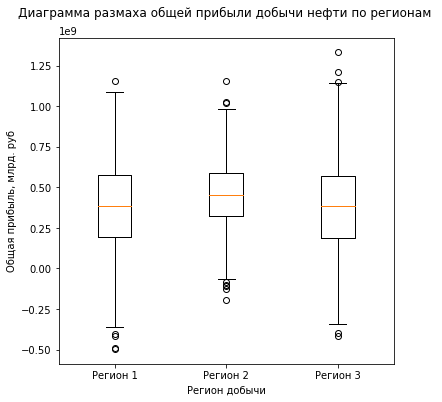

In [64]:
plt.subplots(figsize=(6, 6))
plt.boxplot([profit_0, profit_1, profit_2], labels=['Регион 1', 'Регион 2', 'Регион 3'])
plt.xlabel('Регион добычи')
plt.ylabel('Общая прибыль, млрд. руб')
plt.title('Диаграмма размаха общей прибыли добычи нефти по регионам \n')
plt.show()

Наименьший размах имеет прибыль во 2-м регионе. Средняя прибыль убвает в порядке 2-й, 3-й, 1-й регион и составляет соответственно 456, 402, 392 млн. руб.

Найдем 95% доверительный интервал для прибыли, для этого возьмем 2.5%-квантиль снизу и сверху выборки:

In [65]:
lower_0 = profit_0.quantile(0.025)

In [66]:
upper_0 = profit_0.quantile(0.975)

In [67]:
lower_1 = profit_1.quantile(0.025)

In [68]:
upper_1 = profit_1.quantile(0.975)

In [69]:
lower_2 = profit_2.quantile(0.025)

In [70]:
upper_2 = profit_2.quantile(0.975)

In [71]:
print('95% доверительный интервал:')
print('для первого региона от {:.2f} млн.руб. до {:.2f} млн.руб.'.format(
        lower_0/10**6, upper_0/10**6))
print('для второго региона от {:.2f} млн.руб. до {:.2f} млн.руб.'.format(
        lower_1/10**6, upper_1/10**6))
print('для третьего региона от {:.2f} млн.руб. до {:.2f} млн.руб.'.format(
        lower_2/10**6, upper_2/10**6))

95% доверительный интервал:
для первого региона от -148.69 млн.руб. до 909.15 млн.руб.
для второго региона от 48.07 млн.руб. до 848.71 млн.руб.
для третьего региона от -146.45 млн.руб. до 945.36 млн.руб.


Показатели 95% доверительного интервала прибыли для второго региона единственные, которые не имеют убытка (отрицательной прибыли).

Найдем риск убытков - посчитаем вероятность того, что значение прибыли будет отрицательным. Создадим функцию для подсчёта кол.-ва отрицательных значений из бутстреповской выборки прибыли:

In [72]:
def loss_calc(profit_data):
    count = 0
    for profit in profit_data:
        if profit < 0:
            count += 1
    return count/1000

Применим функцию и посмотрим на вероятность отрицательных значений по трем регионам:

In [73]:
print('Вероятность убытков в первом регионе: ', loss_calc(profit_0))
print('Вероятность убытков во втором регионе: ', loss_calc(profit_1))
print('Вероятность убытков в третьем регионе: ', loss_calc(profit_2))

Вероятность убытков в первом регионе:  0.083
Вероятность убытков во втором регионе:  0.015
Вероятность убытков в третьем регионе:  0.09


Вероятность убытков менее 2.5% у нас имеется только во втором регионе. 

### Вывод

На данном этапе методом бутстрепа было создано 1000 подвыборок размером в 200 значений из валидационной выборки для исследования распределения лучших по запасам предсказанных моделью скважин. По распределению были найдены средние запасы, построен 95% доверительный интервал, а также найден регион с вероятностью убытков меньше заданной. Исходя из полученных данных можно сказать, что для нашей компании наиболее выгодно продолжать разработку скважин во втором регионе: здесь имеется бОльшая средняя прибыль, меньший размах прибыли, отсутствие убытков в 95% доверительном интервале прибыли, а также вероятность убытков меньше заданных 2.5%.

# Чек-лист готовности проекта

- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован